In [1]:
import pickle
import sys

sys.path.append("/opt/ros/noetic/lib/python3/dist-packages")
sys.path.append("../")

In [2]:
with open(f"./data/pointcloud2_msg.pkl", "rb") as f:
    msg = pickle.load(f)

print(type(msg))
print(msg.height, msg.width)

<class 'sensor_msgs.msg._PointCloud2.PointCloud2'>
480 640


In [3]:
from pointcloud2_bridge import PointCloud2Bridge

pc2_bridge = PointCloud2Bridge()

In [4]:
ndarray_dict = pc2_bridge.pointcloud2_to_numpy(msg)

print(ndarray_dict.keys())
print(ndarray_dict["xyz"].shape)
print(ndarray_dict["rgb"].shape)

dict_keys(['rgb', 'xyz'])
(480, 640, 3)
(480, 640, 3)


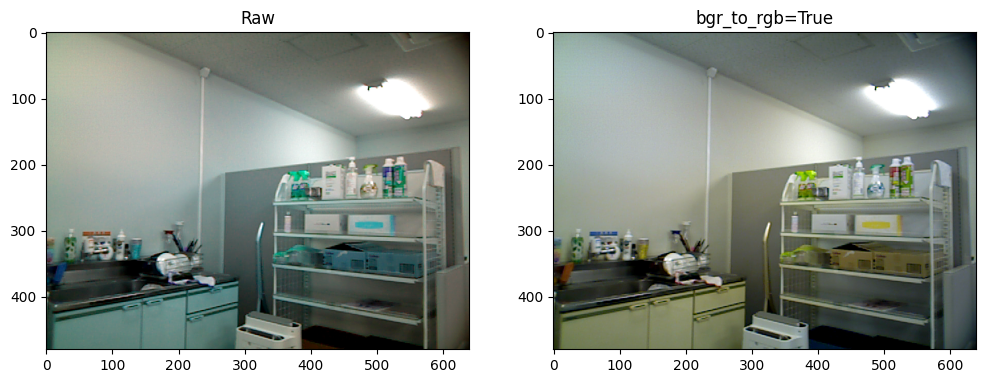

In [5]:
import matplotlib.pyplot as plt

reversed_ndarray_dict = pc2_bridge.pointcloud2_to_numpy(msg, bgr_to_rgb=True)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.title("Raw")
plt.imshow(ndarray_dict["rgb"])
plt.subplot(1, 2, 2)
plt.title("bgr_to_rgb=True")
plt.imshow(reversed_ndarray_dict["rgb"])

plt.show()

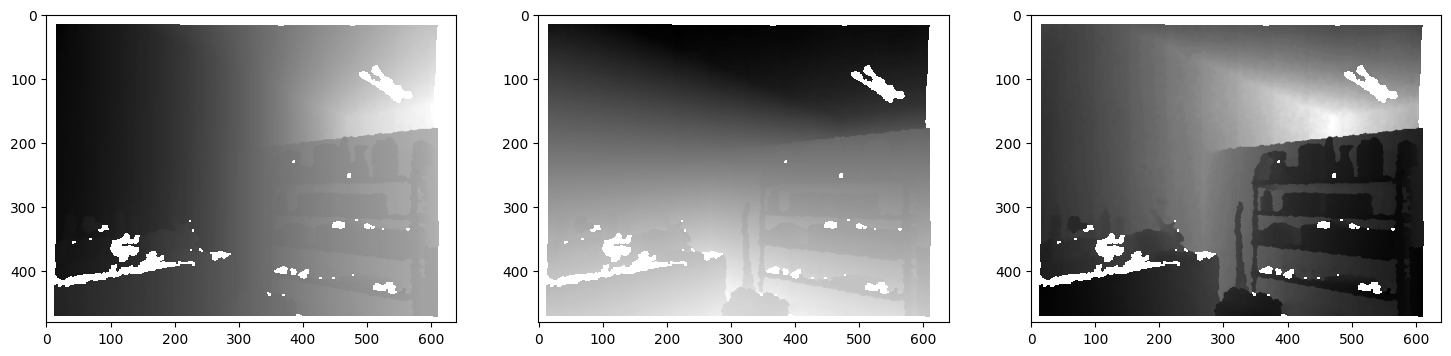

In [6]:
xyz = ndarray_dict["xyz"]

plt.figure(figsize=(18, 8))
plt.subplot(1, 3, 1)
plt.imshow(xyz[..., 0], cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(xyz[..., 1], cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(xyz[..., 2], cmap="gray")
plt.show()